###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2024-25



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: **Οικονόμου Γεώργιος** (Oikonomou George)

Α.Μ.: **03121103**

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1ro8ff5KZwErgkxIvb3D5ykp2l5nV75Yj/view?usp=sharing).


**Βιβλιοθήκες:** Αρχικά, φορτώνουμε όλες τις απαραίτητες βιβλιοθήκες για το σύνολο των ερωτημάτων.

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from imblearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectKBest,chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import FunctionTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [ ]:
# Question 1.a. Load the uploaded file (CSV file)

uploaded = files.upload()

for fn in uploaded.keys():
  data = pd.read_csv(fn)
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Display the first few rows of the file to better understand the data format
data.head()

Saving train-val.csv to train-val (1).csv
User uploaded file "train-val (1).csv" with length 799853 bytes


,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3423,2016-03-04,Tuggeranong,14.4,32.2,11.0,NaN,NaN,NE,22.0,...,81.0,32.0,1021.6,1018.0,NaN,NaN,18.4,31.2,1,0
1,6095,2013-06-23,GoldCoast,11.0,21.5,0.0,NaN,NaN,S,43.0,...,64.0,58.0,1024.1,1021.2,NaN,NaN,17.1,20.2,0,0
2,403,2009-07-05,Cobar,8.3,14.7,0.0,2.4,7.4,SSW,24.0,...,79.0,55.0,1021.8,1019.7,7.0,6.0,10.6,14.0,0,0
3,333,2014-10-12,BadgerysCreek,8.8,32.2,0.0,NaN,NaN,ENE,37.0,...,65.0,18.0,1017.5,1011.7,NaN,NaN,17.7,30.9,0,0
4,2085,2012-07-04,Sydney,7.2,16.2,0.0,3.6,6.4,NaN,NaN,...,55.0,43.0,1024.6,1025.1,3.0,7.0,9.6,15.9,0,1


### 2. Διερευνητική ανάλυση δεδομένων - Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

---
**Ερώτημα 2α.** Χρησιμοποιώ την μέθοδο **.shape** της pandas για να βρω το πλήθος των δειγμάτων (samples, δηλαδή, τα rows του CSV αρχείου) και το πλήθος των χαρακτηριστικών (features, δηλαδή, τα columns του CSV αρχείου).

Προκύπτουν 7262 δείγματα και 24 χαρακτηριστικά.

---



In [ ]:
# Question 2a.

samples, features = data.shape
print(data.shape)
print("The number of samples (rows) is:", samples)
print("The number of features (columns) is:", features)

---
**Ερώτημα 2β.** Χρησιμοποιώ την μέθοδο **.dtypes** και βρίσκω το είδος των χαρακτηριστικών του συνόλου δεδομένων.

---

In [ ]:
# Question 2b.

feature_types = data.dtypes
feature_types

,0
ID,int64
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64


---
**Ερώτημα 2γ.** Τα χαρακτηριστικά (features) ενός συνόλου δεδομένων αντιστοιχούν στις στήλες (columns) του αρχείου CSV. Για να εμφανίσω τις ετικέτες αυτών των χαρακτηριστικών, χρησιμοποιώ την μέθοδο **.columns** της pandas.

---

In [ ]:
# Question 2c.

feature_names = data.columns
feature_names

Index(['ID', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

---
**Ερώτημα 2δ.** Για να βρω το πλήθος των μοναδικών κατηγοριών σε όλες τις στήλες του CSV, χρησιμοποιώ την μέθοδο **.nunique()** της pandas σε όλες τις στήλες.

Αξίζει να παρατηρηθεί πως το χαρακτηριστικό "RainTomorrow" έχει δύο μοναδικές κατηγορίες, το "0" ή το "1". Αυτές οι τιμές είναι τα class labels, που θα χρησιμοποιηθούν στην επιβλεπόμενη μάθηση. Από εδώ και κάτω ως "κατηγορίες" ορίζω μόνο τις τιμές της πρόβλεψης, δηλαδή, του χαρακτηριστικού "RainTomorrow".

---

In [ ]:
# Question 2d.

unique_categories = data.nunique()
print(unique_categories)

# Categories of Class Label

unique_labels = data['RainTomorrow'].unique()
print("Unique class labels:", unique_labels)

ID               7262
Date             2268
Location           49
MinTemp           326
MaxTemp           375
Rainfall          240
Evaporation       149
Sunshine          137
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       33
WindSpeed3pm       36
Humidity9am        98
Humidity3pm       100
Pressure9am       418
Pressure3pm       404
Cloud9am            9
Cloud3pm           10
Temp9am           344
Temp3pm           368
RainToday           2
RainTomorrow        2
dtype: int64
Unique class labels: [0 1]


---
**Ερώτημα 2ε.**  Χρησιμοποιώ την μέθοδο **.value_counts()** και βρίσκω τα πόσα δείγματα ανήκουν σε κάθε κατηγορία, τo "0" ή το "1".

---

In [ ]:
# Question 2e.

num_labels = data['RainTomorrow'].value_counts()
print("Amount of samples in categories:", num_labels)

Amount of samples in categories: RainTomorrow
0    5623
1    1639
Name: count, dtype: int64


---
**Ερώτημα 2στ.**  Χρησιμοποιώ την μέθοδο **.corr()** για να προσεγγίσω τη συσχέτιση μεταξύ των δεδομένων. Γνωρίζω πως οι τιμές κυμαίνονται από -1 έως 1 και όσο πιο κοντά είναι στη τιμή 1, τόσο μεγαλύτερη είναι η σχέση μεταξύ δύο αριθμητικών χαρακτηριστικών.

Ωστόσο, μπορώ να υπολογίσω τη συσχέτιση μόνο μεταξύ των αριθμητικών χαρακτηριστικών του συνόλου δεδομένων, αποκλείοντας στήλες όπως η "Date". Με αυτόν τον τρόπο, παρουσιάζω τον πίνακα συσχέτισης δεδομένων.

---

                     ID   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
ID             1.000000  0.101510  0.133521 -0.032217     0.071010  0.051325   
MinTemp        0.101510  1.000000  0.709894  0.093915     0.460272  0.064273   
MaxTemp        0.133521  0.709894  1.000000 -0.098454     0.571740  0.469705   
Rainfall      -0.032217  0.093915 -0.098454  1.000000    -0.074776 -0.182762   
Evaporation    0.071010  0.460272  0.571740 -0.074776     1.000000  0.348179   
Sunshine       0.051325  0.064273  0.469705 -0.182762     0.348179  1.000000   
WindGustSpeed  0.043297  0.165904  0.008927  0.182268     0.168108 -0.068132   
WindSpeed9am   0.069138  0.199696  0.009758  0.127017     0.207150  0.020779   
WindSpeed3pm   0.030900  0.192065  0.057063  0.093557     0.135517  0.047236   
Humidity9am   -0.117635 -0.227187 -0.485498  0.204239    -0.502250 -0.463217   
Humidity3pm   -0.075666  0.023297 -0.493780  0.235734    -0.373950 -0.621705   
Pressure9am   -0.084635 -0.366575 -0.217

<Axes: >

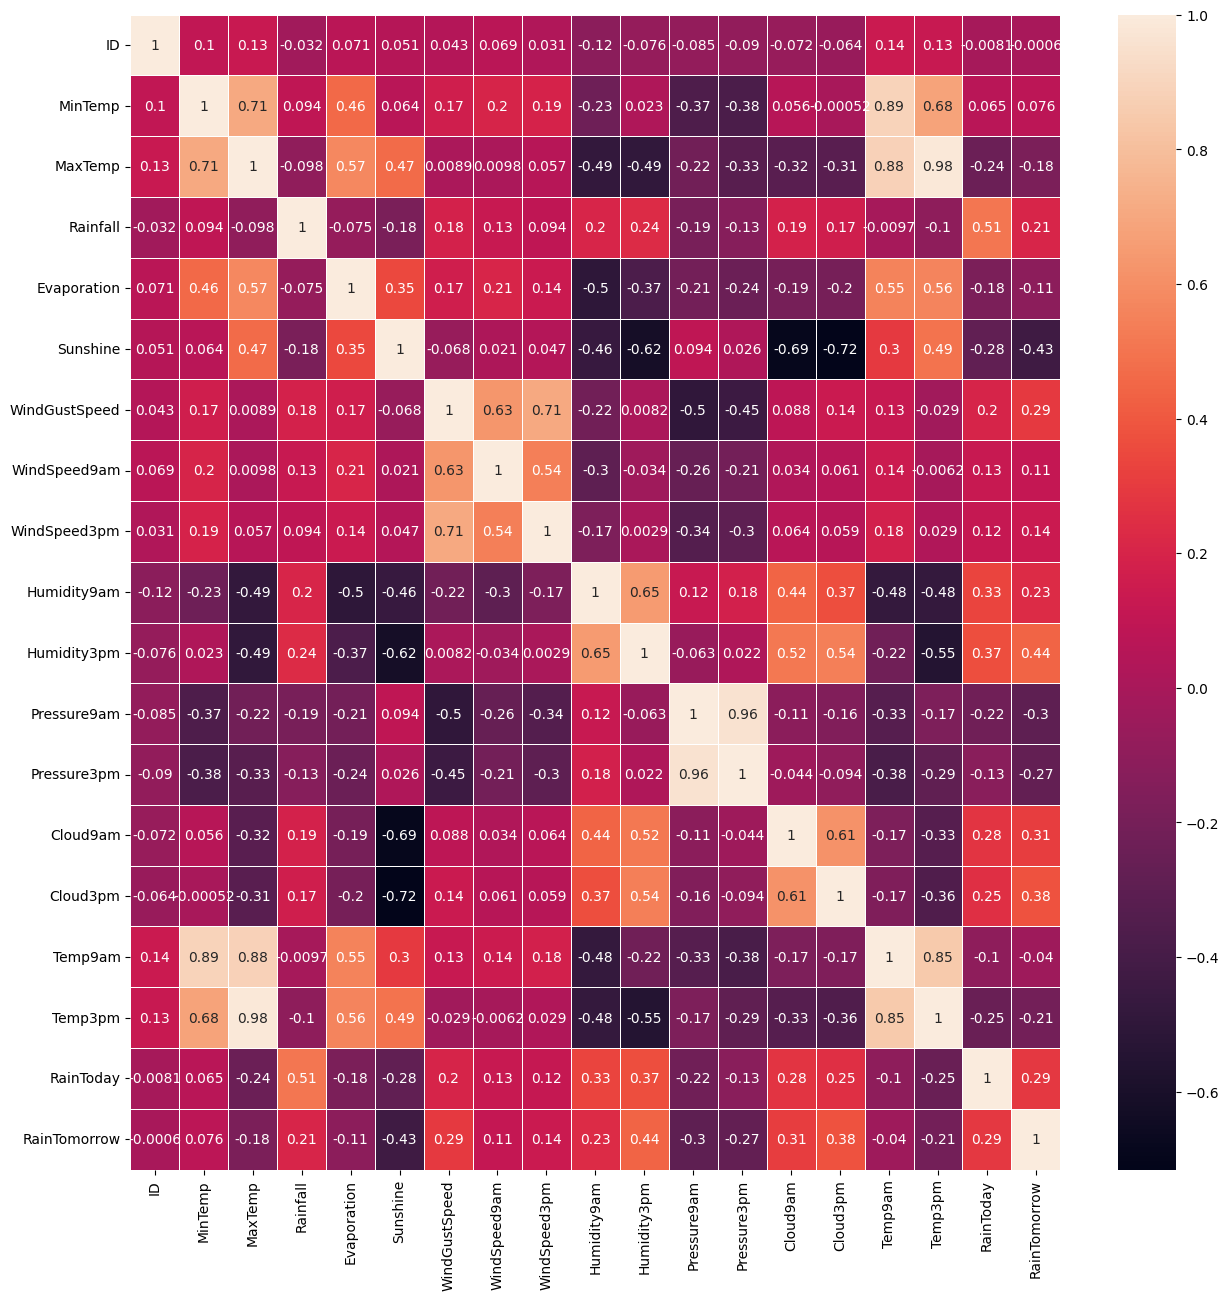

In [ ]:
# Question 2f.

# Select only numerical features for correlation analysis
data_numerical = data.select_dtypes(include='number')

# Calculate the correlation matrix
corr = data_numerical.corr()
print(corr)

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

---
**Ερώτημα 2ζ.** Επιλέγω να απεικονίσω τα δεδομένα των χαρακτηριστικών με την μέθοδο **.hist()** της matplotlib.pyplot για καλύτερη κατανόηση. Παρατηρώ πως:

* Οι κατανομές των χαρακτηριστικών **"RainToday"** και **"RainTomorrow"** είναι εξαιρετικά παρόμοιες.

* Tα χαρακτηριστικά (με δυαδικές τιμές "0" ή "1") **"RainToday"** και **"RainTomorrow"** δείχνουν ότι στις περισσότερες περιπτώσεις δεν βρέχει σήμερα ή αύριο, κάτι που αντανακλά ότι η βροχή δ**"RainTomorrow"**εν είναι συχνή στο δείγμα.

**Έχουμε, λοιπόν, ανισοσκελή δεδομένα.**

* Οι κατανομές των χαρακτηριστικών **MinTemp** και **MaxTemp** είναι παρόμοιες.

* Η ταχύτητα του ανέμου **WindSpeed** κυμαίνεται κυρίως σε τιμές 5–20 (θεωρώ μ.μ: km/h).

* Οι κατανομές των χαρακτηριστικών **Pressure9am** και **Pressure3am** είναι εξαιρετικά παρόμοιες. Δηλαδή, η τιμή της πίεσης στο χρονικό πλαίσιο αυτό παραμένει "σταθερή".

* Ομοίως, για τα χαρακτηριστικά **Temp9am** και **Temp3am**, αν και εδώ παρατηρούνται μικρές διαφοροποιήσεις.


Παρατηρώ πως χαρακτηριστικά όπως η θερμοκρασία και η υγρασία εμφανίζουν κανονικές ή σχεδόν κανονικές κατανομές. Πιο σημαντικά,



---

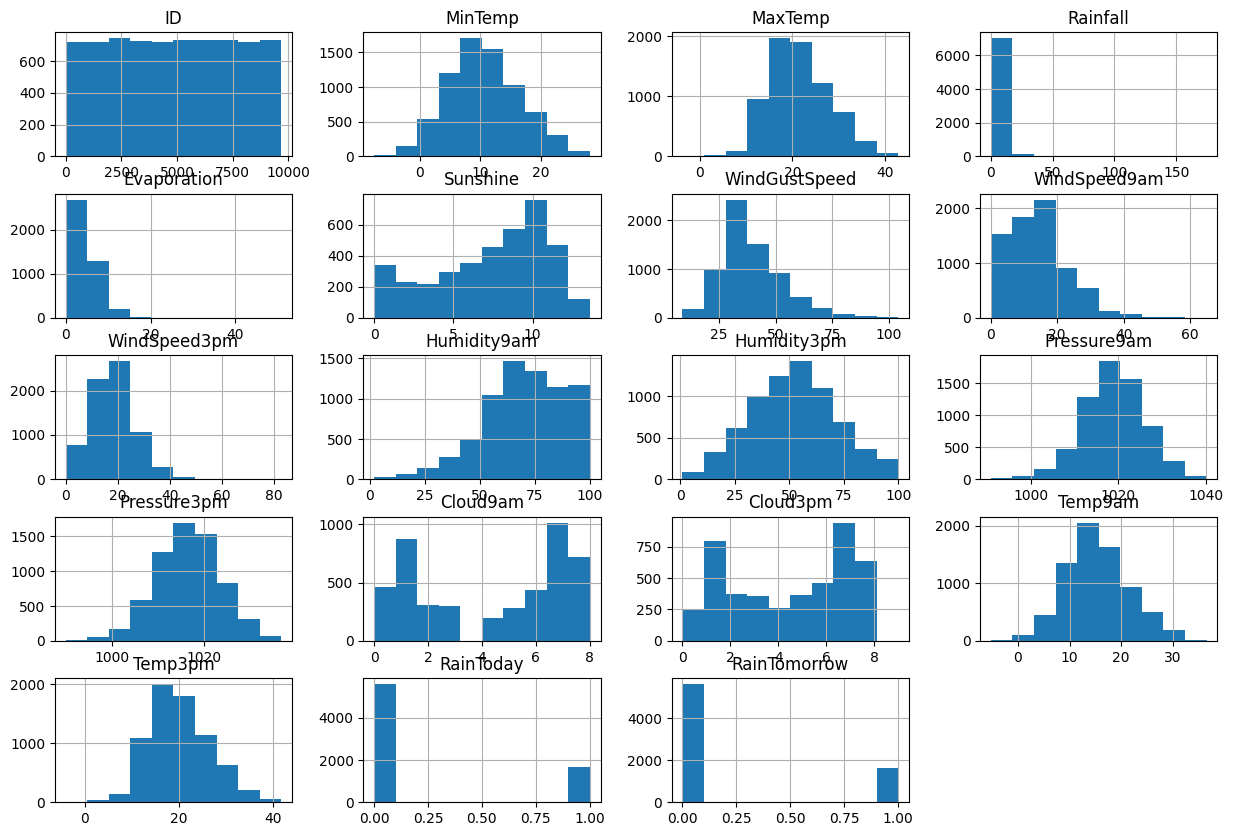

In [ ]:
# Question 2g.

data.hist(bins=10, figsize=(15, 10))
plt.show()

 ⚠️ Κατά την προεπεξεργασία του συνόλου δεδομένων (τόσο του train-val όσο και του test) **MHN ΑΦΑΙΡΕΣΕΤΕ ΤΗΝ ΣΤΗΛΗ ID**  διότι χρειάζεται για τον διαγωνισμό kaggle.

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


---
**Data Preprocessing**

Από τον πίνακα συσχέτισης δεδομένων, μπορώ να βρω τα ζεύγη των χαρακτηριστικών με υψηλή συσχέτιση μεταξύ τους (περισσότερο από 0.8):

*   **MinTemp** και **Temp9am**
*   **MaxTemp** και **Temp3am**
*   **MaxTemp** και **Temp9am**
*   **Pressure9am** και **Pressure3am**

H υψηλή συσχέτιση δείχνει ότι μόνο μία από τις μεταβλητές του εκάστοτε ζεύγους πρέπει να συμπεριληφθεί στο μοντέλο μας, αυτή με την μεγαλύτερη συσχέτιση με την target class **"RainTomorrow"**.

Θα επιλέξω να αφαιρέσω το Date και το Year, καθώς δεν φαίνεται να έχουν άμεση σχέση με την πιθανότητα βροχής την επόμενη μέρα. Αντίθετα, θα διατηρήσω μόνο τον μήνα, μετατρέποντάς τον σε αριθμητική μορφή για να χρησιμοποιηθεί στο μοντέλο.

---

In [ ]:
# Question 3a.

#data['Date'] = pd.to_datetime(data['Date'])
#data['Month'] = data['Date'].dt.month

data.drop(['MaxTemp', 'Temp9am', 'Pressure3pm', 'Date'], axis=1, inplace=True)
print(data.head())

     ID       Location  MinTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  3423    Tuggeranong     14.4      11.0          NaN       NaN          NE   
1  6095      GoldCoast     11.0       0.0          NaN       NaN           S   
2   403          Cobar      8.3       0.0          2.4       7.4         SSW   
3   333  BadgerysCreek      8.8       0.0          NaN       NaN         ENE   
4  2085         Sydney      7.2       0.0          3.6       6.4         NaN   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           22.0        NaN        NNW           0.0          11.0   
1           43.0          S        SSE          15.0          30.0   
2           24.0        SSW        SSW          13.0           7.0   
3           37.0        SSW        NNE           2.0          15.0   
4            NaN          W        SSW          28.0          26.0   

   Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  Temp3pm  \
0         81.0         32

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

---
Υπάρχουν απουσιάζουσες τιμές που βρίσκω με την μέθοδο **.isnull()** της pandas. Στην περίπτωση αυτή, αντικαθιστώ τις απουσιάζουσες κατηγορικές με **mode** και τις απουσιάζουσες αριθμητικές τιμές με **mean** αντίστοιχα.

---



In [ ]:
# Question 3b.
# Show missing values
data.isnull().sum()

,0
ID,0
Location,0
MinTemp,25
Rainfall,0
Evaporation,3039
Sunshine,3445
WindGustDir,475
WindGustSpeed,473
WindDir9am,570
WindDir3pm,213


In [ ]:
# Select only numerical features to fill with mean()
#data.fillna(data.select_dtypes(include='number').mean(), inplace=True)

# Select only categorical features to fill with mode()
#data.fillna(data.select_dtypes(include='object').mode().iloc[0], inplace=True)

# Show missing values to check if filling is correct
#data.isnull().sum()

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

---
Οι κατηγορικές μεταβλητές που έχουμε είναι οι **Location**,	**WindGustDir**,	**WindDir9am**, και	**WindDir3pm**, τις οποίες και βρίσκω με την μέθοδο **describe(include="object")** της pandas.

---



In [ ]:
# Question 3c.

data.describe(include="object")

,Location,WindGustDir,WindDir9am,WindDir3pm
count,7262,6787,6692,7049
unique,49,16,16,16
top,Brisbane,W,N,W
freq,184,546,611,554


In [ ]:
# handle numeric features
numeric_features = ['MinTemp','Rainfall', 'Evaporation', 'Sunshine',
                    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                    'Humidity9am',	'Humidity3pm', 'Pressure9am',
                    'Cloud9am',	'Cloud3pm', 'Temp3pm']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Handle categorical features
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore', sparse_output = False))])

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη.

---
 Το pipeline του προηγουμένου ερωτήματος για τα αριθμητικά χαρακτηριστικά περιλαμβάνει την κλιμάκωση με τον **StandardScaler()**.

---



In [ ]:
# Question 3d.
# Code in the previous snippet

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [ ]:
# Question 3e.

# Create a transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [ ]:
# Question 3f.

features = data.drop(columns=['RainTomorrow'])
labels = data['RainTomorrow']

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [ ]:
# Question 3g.

test_size = 0.3 # Test-set fraction
rand_state = 78 # Random seed

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = test_size, random_state = rand_state)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest

 4.α.  Εκπαιδεύστε (fit) και τους 7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [ ]:
data.describe(include="object")

,Location,WindGustDir,WindDir9am,WindDir3pm
count,7262,6787,6692,7049
unique,49,16,16,16
top,Brisbane,W,N,W
freq,184,546,611,554


In [ ]:
# Question 4a.
# Ignore "ConvergenceWarning" of MLP Classifier with standards parameters
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#print("Samples from the training set:")
#print(X_train.head())
#print("\nCorresponding labels:")
#print(y_train.head())

smt = SMOTE(random_state = rand_state)

# Initialize classifier:
# 1. Naive Bayes
gnb = GaussianNB()
# 2. KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
# 3. LogisticRegression
lreg = LogisticRegression(random_state = rand_state)
# 4. MLP με ένα κρυφό επίπεδο με 100 νευρώνες
mlp = MLPClassifier(random_state = rand_state)
# 5. SVC
svc = svm.SVC()
# 6. Decision Tree
dec_tree = DecisionTreeClassifier(random_state = rand_state)
# 7. Random Forest
rndf = RandomForestClassifier(random_state = rand_state)

classifiers = [
    ('Naive Bayes', gnb),
    ('K-Nearest Neighbors', knn),
    ('Logistic Regression', lreg),
    ('MLP', mlp),
    ('SVC', svc),
    ('Decision Tree', dec_tree),
    ('Random Forest', rndf)
    ]

reports = {}

for name, clf in classifiers:
    # Set the pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    # Fit the pipeline
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.\n")

    # Predict
    y_pred = model.predict(X_test)
    print(f"{name} predicted successfully.\n")

    # Compute the classification report
    report = classification_report(y_test, y_pred, output_dict = True)
    reports[name] = report

Naive Bayes trained successfully.

Naive Bayes predicted successfully.

K-Nearest Neighbors trained successfully.

K-Nearest Neighbors predicted successfully.

Logistic Regression trained successfully.

Logistic Regression predicted successfully.

MLP trained successfully.

MLP predicted successfully.

SVC trained successfully.

SVC predicted successfully.

Decision Tree trained successfully.

Decision Tree predicted successfully.

Random Forest trained successfully.

Random Forest predicted successfully.



4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
# Question 4b.
# Code in the previous snippet


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


---

Οι καλύτεροι ταξινομητές φαίνεται να είναι οι **Logistic Regression**, **SVC** και **Random Forest** καθώς εμφανίζουν καλή απόδοση (0.84).

Σε κάθε περίπτωση, παρατηρώ ότι το F1 score είναι μικρότερο για την κλάση **RainTomorrow = 0**, και αυτό οφείλεται στο ότι έχουμε ανισοσκελή δεδομένα με την κλάση να είναι σημαντικά μικρότερη.

---

In [ ]:
# Question 4c.

models = [
    'Naive Bayes',
    'K-Nearest Neighbors',
    'Logistic Regression',
    'MLP',
    'SVC',
    'Decision Tree',
    'Random Forest'
]

for name, report in reports.items():
    print(f"{name} Classification Report:\n{report}\n")

f1_scores_weighted = [reports[name]['weighted avg']['f1-score'] for name in models]
f1_scores_weighted

Naive Bayes Classification Report:
{'0': {'precision': 0.8672985781990521, 'recall': 0.538235294117647, 'f1-score': 0.6642468239564429, 'support': 1700.0}, '1': {'precision': 0.3016014234875445, 'recall': 0.7077244258872651, 'f1-score': 0.4229569557080474, 'support': 479.0}, 'accuracy': 0.575493345571363, 'macro avg': {'precision': 0.5844500008432982, 'recall': 0.6229798600024561, 'f1-score': 0.5436018898322451, 'support': 2179.0}, 'weighted avg': {'precision': 0.7429438571771098, 'recall': 0.575493345571363, 'f1-score': 0.6112051319458961, 'support': 2179.0}}

K-Nearest Neighbors Classification Report:
{'0': {'precision': 0.8530197755211117, 'recall': 0.9388235294117647, 'f1-score': 0.8938672640716886, 'support': 1700.0}, '1': {'precision': 0.6623376623376623, 'recall': 0.42588726513569936, 'f1-score': 0.5184243964421855, 'support': 479.0}, 'accuracy': 0.8260670032124828, 'macro avg': {'precision': 0.757678718929387, 'recall': 0.6823553972737321, 'f1-score': 0.706145830256937, 'suppor

[0.6112051319458961,
 0.811335307396823,
 0.8377227026178989,
 0.8215903797483101,
 0.8377915443553823,
 0.7786716219524978,
 0.8320211954728577]

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


---

Τα δύο καλύτερα μοντέλα είναι το **Logistic Regression** και το **SVC**, και τα δύο με ακρίβεια και weighted F1 score περίπου 83-84%.

---



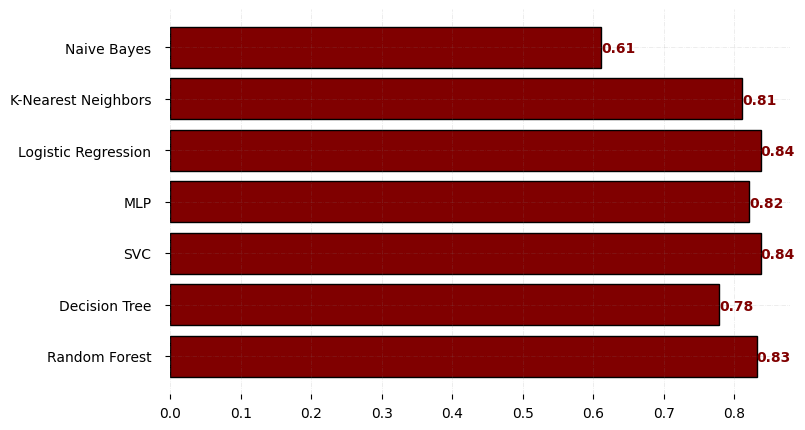

In [ ]:
# Question 4d.

# Weighted average F1 scores από τα classification reports

# Figure Size
fig, ax = plt.subplots(figsize =(8, 5))

# Horizontal Bar Plot
ax.barh(models, f1_scores_weighted,
        color='maroon', edgecolor='black', linewidth = 1)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='maroon')

# Show Plot
plt.show()

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  data_test = pd.read_csv(fn)
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Display the first few rows of the file to better understand the data format
data_test.head()

Saving test.csv to test.csv
User uploaded file "test.csv" with length 261279 bytes


,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8790,2015-05-02,Hobart,10.2,18.2,0.0,3.0,1.2,NW,46.0,...,7.0,71.0,65.0,1017.9,1012.2,7.0,7.0,11.8,17.4,0
1,2095,2012-09-22,Sydney,12.4,22.7,0.8,4.8,10.9,ESE,33.0,...,17.0,49.0,50.0,1016.2,1013.1,1.0,1.0,19.0,20.9,0
2,4316,2011-09-24,MelbourneAirport,5.2,15.0,0.0,4.0,7.8,SSE,50.0,...,33.0,52.0,45.0,1023.8,1021.9,4.0,7.0,11.4,12.7,0
3,6075,2012-10-17,GoldCoast,15.9,27.4,0.0,NaN,NaN,NNE,41.0,...,30.0,49.0,67.0,1020.6,1015.2,NaN,NaN,22.9,22.9,0
4,347,2015-06-05,BadgerysCreek,3.6,15.1,2.0,NaN,NaN,WSW,28.0,...,13.0,100.0,58.0,1019.5,1019.5,NaN,NaN,8.3,14.6,1


5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/14HsEya9h1wxk2wJLh6c0Ibz2V4_WA13p/view?usp=sharing).


---
Tα μοντέλα **Logistic Regression** και **SVC** έχουν τις καλύτερες επιδόσεις, με F1 score 0.84. Επιλέγω το **Logistic Regression** και κάνω τα ίδια steps με πριν για το νέο σύνολο test set.

---



In [ ]:
# Question 5a. (similar to Question 3a.)

#data_test['Date'] = pd.to_datetime(data_test['Date'])
#data_test['Month'] = data_test['Date'].dt.month

data_test.drop(['MaxTemp', 'Temp9am', 'Pressure3pm', 'Date'], axis=1, inplace = True)
# print(data_test.head())

classifier = LogisticRegression(random_state = rand_state)

 # Set the pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
     ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)
print(f"{classifier} trained successfully.\n")

# Predict
y_pred = model.predict(data_test)
print(f"{classifier} predicted successfully.\n")

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

---
Υποβάλλουμε το εκπαιδευμένο μοντέλο στο Kaggle και λαμβάνω **Score** ίσο με **0.59217**.

---



In [ ]:
# Question 5b.

y_pred = y_pred.astype(int)

# Extract IDs from data_test set
IDs = data_test.iloc[:, 0].values

results_to_csv = pd.DataFrame(data={"ID": IDs, "RainTomorrow": y_pred})


# y_pred is numpy.ndarray
results_to_csv

path = '/content/drive/My Drive/ML/'
results_to_csv.to_csv(path, index = False)

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [ ]:
# Question 6a.

folds = 5
kf = KFold(n_splits = folds, shuffle = True, random_state = rand_state)
opt_f1_scores = {}
opt_f1_scores_to_print = []
# Create space of candidate learning algorithms and their hyperparameters

search_space = [
    # Naive Bayes Hyperparameter: var_smoothing
     {'classifier': [GaussianNB()],
      'classifier__var_smoothing': np.logspace(0, -9, num = 12)},

    # K-Nearest Neighbors
     {'classifier': [KNeighborsClassifier()],
      'classifier__n_neighbors': [1, 3, 5, 7, 9],
      'classifier__metric':['euclidean', 'manhattan']},

    # Logistic Regression
     {'classifier': [LogisticRegression()],
      'classifier__penalty': ['l1', 'l2', 'elasticnet'],
      'classifier__C': np.logspace(-2, 2, 20),
      'classifier__solver':['lbfgs', 'liblinear', 'newton-cg', 'saga'],
      'classifier__max_iter': [100, 300]},

    # MLP Hyperparameters: hidden_layer_sizes, activation, solver, alpha, learning_rate, learning_rate_init
     {'classifier': [MLPClassifier()],
      'classifier__hidden_layer_sizes': [(50,), (100,), (200,)],
      'classifier__activation': ['relu', 'tanh'],
      'classifier__solver': ['adam', 'sgd', 'lbfgs'],
      'classifier__learning_rate': ['constant', 'adaptive'],
      'classifier__max_iter': [100, 200]},

    # SVC
     {'classifier': [svm.SVC()],
      'classifier__kernel': ['rbf','linear'],
      'classifier__gamma': ['scale', 'auto'],
      'classifier__C': [0.1, 1, 10, 100, 100],
      'classifier__class_weight': ['balanced', None]},

    # Decision Tree Hyperparameters: max_depth, min_samples_split, min_samples_leaf, max_features, criterion, max_leaf_nodes, min_impurity_decrease
     {'classifier': [DecisionTreeClassifier()],
      'classifier__max_depth': [3, 5, 7, 10, 15],
      'classifier__min_samples_leaf': range(5, 11, 1),
      'classifier__min_samples_split': range(2, 11, 1),
      'classifier__max_features': ['sqrt', 'log2'],
      'classifier__criterion': ['gini', 'entropy'],
      'classifier__class_weight': ['balanced', None]},

    # Random Forest
     {'classifier': [RandomForestClassifier()],
      'classifier__n_estimators': [50, 100, 200],
      'classifier__max_depth': [None, 3, 5, 7, 10, 20, 50],
      'classifier__criterion': ['gini','entropy']}
    ]

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).




---

**Naive Bayes**

---



In [ ]:
classifier = GaussianNB()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space[0], cv = kf, scoring = 'f1', n_jobs = -1)

# Fit grid search
best_model = grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

# Predict
y_pred = best_model.predict(X_test)

# Compute the classification report
report = classification_report(y_test, y_pred, output_dict = True)
opt_f1_scores['Naive Bayes'] = report['weighted avg']['f1-score']

Best Hyperparameters: {'classifier': GaussianNB(), 'classifier__var_smoothing': 0.15199110829529336}
Best Cross-Validated Score: 0.5841461144505669




---

**K-Nearest Neighbors**

---



In [ ]:
classifier = KNeighborsClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space[1], cv = kf, scoring = 'f1', n_jobs = -1)

# Fit grid search
best_model = grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

# Predict
y_pred = best_model.predict(X_test)

# Compute the classification report
report = classification_report(y_test, y_pred, output_dict = True)
opt_f1_scores['K-Nearest Neighbors'] = report['weighted avg']['f1-score']

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'classifier': KNeighborsClassifier(), 'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5}
Best Cross-Validated Score: 0.5318942471534289




---

**Logistic Regression**

---



In [ ]:
classifier = LogisticRegression()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space[2], cv = kf, scoring = 'f1', n_jobs = -1)

# Fit grid search
best_model = grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

# Predict
y_pred = best_model.predict(X_test)

# Compute the classification report
report = classification_report(y_test, y_pred, output_dict = True)
opt_f1_scores['Logistic Regression'] = report['weighted avg']['f1-score']

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib

Best Hyperparameters: {'classifier': LogisticRegression(), 'classifier__C': 0.7847599703514611, 'classifier__max_iter': 300, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Cross-Validated Score: 0.6028407098691111




---

**MLP**

---



In [ ]:
classifier = MLPClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space[3], cv = kf, scoring = 'f1', n_jobs = -1)

# Fit grid search
best_model = grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

# Predict
y_pred = best_model.predict(X_test)

# Compute the classification report
report = classification_report(y_test, y_pred, output_dict = True)
opt_f1_scores['MLP'] = report['weighted avg']['f1-score']
opt_f1_scores

Best Hyperparameters: {'classifier': MLPClassifier(), 'classifier__activation': 'tanh', 'classifier__hidden_layer_sizes': (200,), 'classifier__learning_rate': 'adaptive', 'classifier__max_iter': 100, 'classifier__solver': 'adam'}
Best Cross-Validated Score: 0.6402818882429361


{'Naive Bayes': 0.8030910572000574,
 'K-Nearest Neighbors': 0.811335307396823,
 'Logistic Regression': 0.8379563110891564,
 'MLP': 0.8383359197015153}



---

**SVC**

---



In [ ]:
classifier = svm.SVC()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space[4], cv = kf, scoring = 'f1', n_jobs = -1)

# Fit grid search
best_model = grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

# Predict
y_pred = best_model.predict(X_test)

# Compute the classification report
report = classification_report(y_test, y_pred, output_dict = True)
opt_f1_scores['SVC'] = report['weighted avg']['f1-score']
opt_f1_scores



---

**Decision Tree**

---



In [ ]:
classifier = DecisionTreeClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space[5], cv = kf, scoring = 'f1', n_jobs = -1)

# Fit grid search
best_model = grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

# Predict
y_pred = best_model.predict(X_test)

# Compute the classification report
report = classification_report(y_test, y_pred, output_dict = True)
opt_f1_scores['Decision Tree'] = report['weighted avg']['f1-score']
opt_f1_scores



---

**Random Forest**

---





In [ ]:
classifier = RandomForestClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

grid = GridSearchCV(model, search_space[6], cv = kf, scoring = 'f1', n_jobs = -1)

# Fit grid search
best_model = grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

# Predict
y_pred = best_model.predict(X_test)

# Compute the classification report
report = classification_report(y_test, y_pred, output_dict = True)
opt_f1_scores['Random Forest'] = report['weighted avg']['f1-score']
opt_f1_scores


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


---
Tα μοντέλα **Logistic Regression** και **MLP** έχουν πλέον τις καλύτερες επιδόσεις, με F1 score περίπου 0.84. Επιλέγω ξανά το **Logistic Regression** και κάνω τα ίδια steps με πριν για το σύνολο test set.

---

In [ ]:
# Question 6c.
# Code in the previous snippet

6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


In [ ]:
# Question 6d. (similar to Question 4d.)

# Weighted average F1 scores από τα classification reports

opt_f1_scores_list = list(opt_f1_scores.values())

# Figure Size
fig, ax = plt.subplots(figsize =(8, 5))

# Horizontal Bar Plot
ax.barh(models, opt_f1_scores_list,
        color='maroon', edgecolor='black', linewidth = 1)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='maroon')

# Show Plot
plt.show()



---

Από το γράφημα παρατηρείται ότι οι επιδόσεις των μοντέλων έχουν βελτιωθεί. Ειδικά στην περίπτωση του Naive Bayes, η βελτίωση αγγίζει περίπου το 20%, ενώ για τα υπόλοιπα μοντέλα η βελτίωση κυμαίνεται γύρω στο 1%. Για να επιτύχουμε περαιτέρω αύξηση στην απόδοση των μοντέλων, είναι απαραίτητο να γίνει πιο στοχευμένο tuning των παραμέτρων.

---



### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set).


In [ ]:
# Question 7a. (similar to Question 5a.)
# Best Hyperparameters: {'classifier': LogisticRegression(), 'classifier__C': 0.3180625692794119, 'classifier__penalty': 'l2'}

classifier = LogisticRegression(random_state = rand_state, C = 0.3180625692794119, penalty = 'l2')

 # Set the pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
     ('classifier', classifier)])

# Fit the pipeline
model.fit(X_train, y_train)
print(f"{classifier} trained successfully.\n")

# Predict
y_pred = model.predict(data_test)
print(f"{classifier} predicted successfully.\n")

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [ ]:
# Question 7b.

y_pred = y_pred.astype(int)

# Extract IDs from data_test set
IDs = data_test.iloc[:, 0].values

results_to_csv = pd.DataFrame(data={"ID": IDs, "RainTomorrow": y_pred})


# y_pred is numpy.ndarray
results_to_csv

path = '/content/drive/My Drive/ML/opt_submission.csv'
results_to_csv.to_csv(path, index = False)